*PROJET RéaLiser Par : Mannai Mortadha *





*ABOUT / /* notre projet :c'est un algorithm intelligent d'un Robot capable d'éviter les obstacle devant le puis aller  à sa but avec le plus court chemin !

* CLASSE : GII2/G2*

In [3]:
import random

In [4]:
class Agent(object):
    def __init__(self,env):
        """set up the agent"""
        self.env=env

    def go(self,n):
        """acts for n time steps"""
        raise NotImplementedError("go")   # abstract method

In [7]:
from IPython.display import display_png as dp



In [15]:
class Environment():
    def initial_percepts(self):
        """returns the initial percepts for the agent"""
        raise NotImplementedError("initial_percepts")   # abstract method

    def do(self,action):
        """does the action in the environment
        returns the next percept """
        raise NotImplementedError("do")   # abstract method


In [20]:
class TP_env(Environment):
    prices = [234, 234, 234, 234, 255, 255, 275, 275, 211, 211, 211,
    234, 234, 234, 234, 199, 199, 275, 275, 234, 234, 234, 234, 255,
    255, 260, 260, 265, 265, 265, 265, 270, 270, 255, 255, 260, 260,
    265, 265, 150, 150, 265, 265, 270, 270, 255, 255, 260, 260, 265,
    265, 265, 265, 270, 270, 211, 211, 255, 255, 260, 260, 265, 265,
    260, 265, 270, 270, 205, 255, 255, 260, 260, 265, 265, 265, 265,
    270, 270]
    max_price_addon = 20  # maximum of random value added to get price
  


In [22]:
 def __init__(self):
        """paper buying agent"""
        self.time=0
        self.stock=20
        self.stock_history = []  # memory of the stock history
        self.price_history = []  # memory of the price history

In [18]:
def initial_percepts(self):
        """return initial percepts"""
        self.stock_history.append(self.stock)
        price = self.prices[0]+random.randrange(self.max_price_addon)
        self.price_history.append(price)
        return {'price': price,
                'instock': self.stock}

In [23]:
def do(self, action):
        """does action (buy) and returns percepts (price and instock)"""
        used = pick_from_dist({6:0.1, 5:0.1, 4:0.2, 3:0.3, 2:0.2, 1:0.1})
        bought = action['buy']
        self.stock = self.stock+bought-used
        self.stock_history.append(self.stock)
        self.time += 1
        price = (self.prices[self.time%len(self.prices)] # repeating pattern
                 +random.randrange(self.max_price_addon) # plus randomness
                 +self.time//2)                          # plus inflation
        self.price_history.append(price)
        return {'price': price,
                'instock': self.stock}

In [24]:

def pick_from_dist(item_prob_dist):
    """ returns a value from a distribution.
    item_prob_dist is an item:probability dictionary, where the
        probabilities sum to 1.
    returns an item chosen in proportion to its probability
    """
    ranreal = random.random() # between 0 and 1
    for (it,prob) in item_prob_dist.items():
        if ranreal < prob:
            return it
        else:
            ranreal -= prob
    raise RuntimeError(str(item_prob_dist)+" is not a probability distribution")


In [25]:
class TP_agent(Agent):
    def __init__(self, env):
        self.env = env
        self.spent = 0
        percepts = env.initial_percepts()
        self.ave = self.last_price = percepts['price']
        self.instock = percepts['instock']
        
    def go(self, n):
        """go for n time steps
        """
        for i in range(n):
            if self.last_price < 0.9*self.ave and self.instock < 60:
                tobuy = 48
            elif self.instock < 12:
                tobuy = 12
            else:
                tobuy = 0
            self.spent += tobuy*self.last_price
            percepts = env.do({'buy': tobuy})
            self.last_price = percepts['price']
            self.ave = self.ave+(self.last_price-self.ave)*0.05
            self.instock = percepts['instock']

In [35]:
import matplotlib.pyplot as plt


In [37]:
class Plot_prices(object):
    """Set up the plot for history of price and number in stock"""
    def __init__(self, ag,env):
        self.ag = ag
        self.env = env
        plt.ion()
        plt.xlabel("Time")
        plt.ylabel("Number in stock Price.")

    def plot_run(self):
        """plot history of price and instock"""
        num = len(env.stock_history)
        plt.plot(range(num),env.stock_history,label="In stock")
        plt.plot(range(num),env.price_history,label="Price")
        #plt.legend(loc="upper left")
        plt.draw()


No handles with labels found to put in legend.


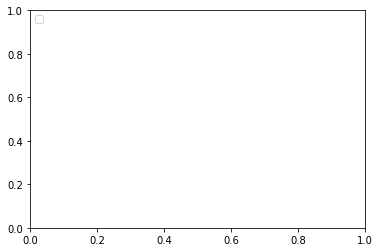

In [105]:
plt.legend(loc="upper left")

In [46]:
env = TP_env()



In [52]:
#ag = TP_agent(env)
#ag.go(90)
#ag.spent/env.time   ## average spent per time period

In [53]:
# pl = Plot_prices(ag,env)
# ag.go(90); pl.plot_run()

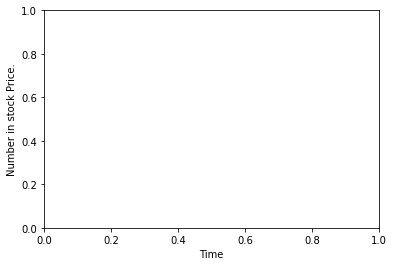

In [101]:
 pl = Plot_prices(ag,env)

In [58]:

INSTALLED_APPS = [
    'django.contrib.admin',
    'django.contrib.auth',
    'django.contrib.contenttypes',
    'django.contrib.sessions',
    'django.contrib.messages',
    'django.contrib.staticfiles',
    'user_agent',
]





In [61]:
import math


In [63]:
pip install -U face_recognition 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 23 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=b80da65f1d85e973eee50391340889153ab49eed76afb172e0f1c00bfe0798cd
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [68]:
import math


class Rob_env(Environment):
    def __init__(self,walls = {}):
        """walls is a set of line segments 
               where each line segment is of the form ((x0,y0),(x1,y1))
        """
        self.walls = walls
        
import math
import matplotlib.pyplot as plt
import time

class Rob_body(Environment):
    def __init__(self, env, init_pos=(0,0,90)):
        """ env is the current environment
        init_pos is a triple of (x-position, y-position, direction) 
            direction is in degrees; 0 is to right, 90 is straight-up, etc
        """
        self.env = env
        self.rob_x, self.rob_y, self.rob_dir = init_pos
        self.turning_angle = 18   # degrees that a left makes
        self.whisker_length = 6   # length of the whisker
        self.whisker_angle = 30   # angle of whisker relative to robot
        self.crashed = False
        # The following control how it is plotted
        self.plotting = True      # whether the trace is being plotted
        self.sleep_time = 0.05     # time between actions (for real-time plotting)
        # The following are data structures maintained:
        self.history = [(self.rob_x, self.rob_y)] # history of (x,y) positions
        self.wall_history = []     # history of hitting the wall

    def percepts(self):
        return {'rob_x_pos':self.rob_x, 'rob_y_pos':self.rob_y,
                'rob_dir':self.rob_dir, 'whisker':self.whisker() , 'crashed':self.crashed}
    initial_percepts = percepts  # use percept function for initial percepts too

    def do(self,action):
        """ action is {'steer':direction}
        direction is 'left', 'right' or 'straight'
        """
        if self.crashed:
            return self.percepts()
        direction = action['steer']  
        compass_deriv = {'left':1,'straight':0,'right':-1}[direction]*self.turning_angle
        self.rob_dir = (self.rob_dir + compass_deriv +360)%360  # make in range [0,360)
        rob_x_new = self.rob_x + math.cos(self.rob_dir*math.pi/180)
        rob_y_new = self.rob_y + math.sin(self.rob_dir*math.pi/180)
        path = ((self.rob_x,self.rob_y),(rob_x_new,rob_y_new))
        if any(line_segments_intersect(path,wall) for wall in self.env.walls):
            self.crashed = True
            if self.plotting:
                plt.plot([self.rob_x],[self.rob_y],"r*",markersize=20.0)
                plt.draw()
        self.rob_x, self.rob_y = rob_x_new, rob_y_new 
        self.history.append((self.rob_x, self.rob_y))
        if self.plotting and not self.crashed:
            plt.plot([self.rob_x],[self.rob_y],"go")
            plt.draw()
            plt.pause(self.sleep_time)
        return self.percepts()

    def whisker(self):
        """returns true whenever the whisker sensor intersects with a wall
        """
        whisk_ang_world = (self.rob_dir-self.whisker_angle)*math.pi/180
            # angle in radians in world coordinates
        wx = self.rob_x + self.whisker_length * math.cos(whisk_ang_world)
        wy = self.rob_y + self.whisker_length * math.sin(whisk_ang_world)
        whisker_line = ((self.rob_x,self.rob_y),(wx,wy))
        hit = any(line_segments_intersect(whisker_line,wall)
                    for wall in self.env.walls)
        if hit:
            self.wall_history.append((self.rob_x, self.rob_y))
            if self.plotting:
                plt.plot([self.rob_x],[self.rob_y],"ro")
                plt.draw()
        return hit
    
def line_segments_intersect(linea,lineb):
    """returns true if the line segments, linea and lineb intersect.
    A line segment is represented as a pair of points.
    A point is represented as a (x,y) pair.
    """
    ((x0a,y0a),(x1a,y1a)) = linea
    ((x0b,y0b),(x1b,y1b)) = lineb
    da, db = x1a-x0a, x1b-x0b
    ea, eb = y1a-y0a, y1b-y0b
    denom = db*ea-eb*da
    if denom==0:    # line segments are parallel
        return False
    cb = (da*(y0b-y0a)-ea*(x0b-x0a))/denom  # position along line b
    if cb<0 or cb>1:
        return False
    ca = (db*(y0b-y0a)-eb*(x0b-x0a))/denom # position along line a
    return 0<=ca<=1

# Test cases:
# assert line_segments_intersect(((0,0),(1,1)),((1,0),(0,1)))
# assert not line_segments_intersect(((0,0),(1,1)),((1,0),(0.6,0.4)))
# assert line_segments_intersect(((0,0),(1,1)),((1,0),(0.4,0.6)))


In [70]:
assert line_segments_intersect(((0,0),(1,1)),((1,0),(0,1)))

In [71]:
assert not line_segments_intersect(((0,0),(1,1)),((1,0),(0.6,0.4)))

In [72]:
assert line_segments_intersect(((0,0),(1,1)),((1,0),(0.4,0.6)))

In [74]:

import math

class Rob_middle_layer(Environment):
    def __init__(self,env):
        self.env=env
        self.percepts = env.initial_percepts()
        self.straight_angle = 11 # angle that is close enough to straight ahead
        self.close_threshold = 2  # distance that is close enough to arrived
        self.close_threshold_squared = self.close_threshold**2 # just compute it once

    def initial_percepts(self):
        return {}

    def do(self, action):
        """action is {'go_to':target_pos,'timeout':timeout}
        target_pos is (x,y) pair
        timeout is the number of steps to try
        returns {'arrived':True} when arrived is true
             or {'arrived':False} if it reached the timeout 
        """
        if 'timeout' in action:
            remaining = action['timeout']
        else:
            remaining = -1    # will never reach 0
        target_pos = action['go_to']
        arrived = self.close_enough(target_pos)
        while not arrived and remaining != 0:
            self.percepts = self.env.do({"steer":self.steer(target_pos)})
            remaining -= 1
            arrived = self.close_enough(target_pos)
        return {'arrived':arrived}

    def steer(self,target_pos):
        if self.percepts['whisker']:
            self.display(3,'whisker on', self.percepts)
            return "left"
        else:
            gx,gy = target_pos
            rx,ry = self.percepts['rob_x_pos'],self.percepts['rob_y_pos']
            goal_dir = math.acos((gx-rx)/math.sqrt((gx-rx)*(gx-rx)
                                                   +(gy-ry)*(gy-ry)))*180/math.pi
            if ry>gy:
                goal_dir = -goal_dir
            goal_from_rob = (goal_dir - self.percepts['rob_dir']+540)%360-180
            assert -180 < goal_from_rob <= 180
            if goal_from_rob > self.straight_angle:
                return "left"
            elif goal_from_rob < -self.straight_angle:
                return "right"
            else:
                return "straight"

    def close_enough(self,target_pos):
        gx,gy = target_pos
        rx,ry = self.percepts['rob_x_pos'],self.percepts['rob_y_pos']
        return (gx-rx)**2 + (gy-ry)**2 <= self.close_threshold_squared

In [78]:



class Rob_top_layer(Environment):
    def __init__(self, middle, timeout=200, locations = {'mail':(-5,10), 
                          'o103':(50,10), 'o109':(100,10),'storage':(101,51)} ):
        """middle is the middle layer
        timeout is the number of steps the middle layer goes before giving up
        locations is a loc:pos dictionary 
            where loc is a named location, and pos is an (x,y) position.
        """
        self.middle = middle
        self.timeout = timeout  # number of steps before the middle layer should give up
        self.locations = locations
        
    def do(self,plan):
        """carry out actions.
        actions is of the form {'visit':list_of_locations}
        It visits the locations in turn.
        """
        to_do = plan['visit']
        for loc in to_do:
            position = self.locations[loc]
            arrived = self.middle.do({'go_to':position, 'timeout':self.timeout})
            self.display(1,"Arrived at",loc,arrived)

import matplotlib.pyplot as plt

class Plot_env(object):
    def __init__(self, body,top):
        """sets up the plot
        """
        self.body = body
        plt.ion()
        plt.clf()
        plt.axes().set_aspect('equal')
        for wall in body.env.walls:
            ((x0,y0),(x1,y1)) = wall
            plt.plot([x0,x1],[y0,y1],"-k",linewidth=3)
        for loc in top.locations:
            (x,y) = top.locations[loc]
            plt.plot([x],[y],"k<")
            plt.text(x+1.0,y+0.5,loc) # print the label above and to the right
        plt.plot([body.rob_x],[body.rob_y],"go")
        plt.draw()

    def plot_run(self):
        """plots the history after the agent has finished.
        This is typically only used if body.plotting==False
        """
        xs,ys = zip(*self.body.history)
        plt.plot(xs,ys,"go")
        wxs,wys = zip(*self.body.wall_history)
        plt.plot(wxs,wys,"ro")
        #plt.draw()


env = Rob_env({((20,0),(30,20)), ((70,-5),(70,25))})
body = Rob_body(env)
middle = Rob_middle_layer(body)
top = Rob_top_layer(middle)

# try:
# pl=Plot_env(body,top)
# top.do({'visit':['o109','storage','o109','o103']})
# You can directly control the middle layer:
# middle.do({'go_to':(30,-10), 'timeout':200})
# Can you make it crash?

# Robot Trap for which the current controller cannot escape:
trap_env = Rob_env({((10,-21),(10,0)), ((10,10),(10,31)), ((30,-10),(30,0)),
                    ((30,10),(30,20)),  ((50,-21),(50,31)), ((10,-21),(50,-21)),
                    ((10,0),(30,0)),  ((10,10),(30,10)),  ((10,31),(50,31))})
trap_body = Rob_body(trap_env,init_pos=(-1,0,90))
trap_middle = Rob_middle_layer(trap_body)
trap_top = Rob_top_layer(trap_middle,locations={'goal':(71,0)})

# Robot trap exercise:
# pl=Plot_env(trap_body,trap_top)
# trap_top.do({'visit':['goal']})


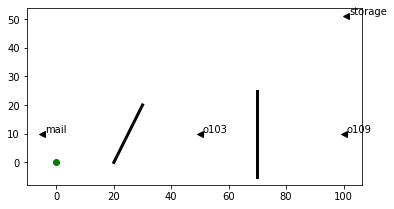

In [79]:
pl=Plot_env(body,top)

In [98]:

class Displayable(object):
    """Class that uses 'display'.
    The amount of detail is controlled by max_display_level
    """
    max_display_level = 1   # can be overridden in subclasses

    def display(self,level,*args,**nargs):
        """print the arguments if level is less than or equal to the
        current max_display_level.
        level is an integer.
        the other arguments are whatever arguments print can take.
        """
        if level <= self.max_display_level:
            print(*args, **nargs)  ##if error you are using Python2 not Python3

def visualize(func):
    """A decorator for algorithms that do interactive visualization.
    Ignored here.
    """
    return func

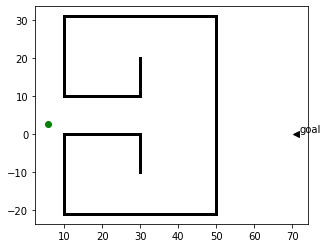

In [113]:
 pl=Plot_env(trap_body,trap_top)